## Holiday Package Prediciton

1) Problem statement.

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

2) Data Collection.

The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction The data consists of 20 column and 4888 rows.

In [163]:
## Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [164]:
df = pd.read_csv("D:\Machine Learning\Random Forest\Travel.csv")
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning ##

Handling Missing values

1.Handling Missing values

2.Handling Duplicates

3.Check data type

4.Understand the dataset

In [165]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [166]:
## Check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [167]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [168]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [169]:
df['Gender'] = df['Gender'].replace('Fe male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [170]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [171]:
## Check all categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [172]:
## Check Missing values
## These are feature with nan values
features_with_nan = [features for features in df.columns if df[features].isnull().sum() > 1]
for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values')


Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [173]:
# Statistics on numerical columns (Null colsumns)
df[features_with_nan].select_dtypes(exclude=['object']).describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000



## Imputing Null values

1.Impute Median value for Age column

2.Impute Mode for Type of Contract

3.Impute Median for Duration of Pitch

4.Impute Mode for NumberofFollowup as it is Discrete feature

5.Impute Mode for PreferredPropertyStar

6.Impute Median for NumberofTrips

7.Impute Mode for NumberOfChildrenVisiting

8.Impute Median for MonthlyIncome

In [174]:

#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [175]:
print(df.columns.tolist())


['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']


In [176]:
df.columns = df.columns.str.strip()  # remove leading/trailing spaces


In [177]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
print(df.columns.tolist())


['customerid', 'prodtaken', 'age', 'typeofcontact', 'citytier', 'durationofpitch', 'occupation', 'gender', 'numberofpersonvisiting', 'numberoffollowups', 'productpitched', 'preferredpropertystar', 'maritalstatus', 'numberoftrips', 'passport', 'pitchsatisfactionscore', 'owncar', 'numberofchildrenvisiting', 'designation', 'monthlyincome']


In [178]:
df['age'].fillna(df['age'].median(), inplace=True)


In [179]:
# Fill numeric columns with median
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [180]:

df.head()
df.isnull().sum()

customerid                  0
prodtaken                   0
age                         0
typeofcontact               0
citytier                    0
durationofpitch             0
occupation                  0
gender                      0
numberofpersonvisiting      0
numberoffollowups           0
productpitched              0
preferredpropertystar       0
maritalstatus               0
numberoftrips               0
passport                    0
pitchsatisfactionscore      0
owncar                      0
numberofchildrenvisiting    0
designation                 0
monthlyincome               0
dtype: int64

In [181]:
df.columns = df.columns.str.strip()  # remove leading/trailing spaces

In [182]:
df.drop(columns=['CustomerID'], inplace=True, errors='ignore')

 ## Feature Engineering

 Feature Extraction

In [183]:
# Create new columns for feature extraction
df['totalvisiting'] = df['numberofpersonvisiting'] + df['numberofchildrenvisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True, errors='ignore')

In [184]:
## Get all the numeric features
num_features = [features for features in df.columns if df[features].dtype != 'o']
print('Num of Numneric Features:', len(num_features))

Num of Numneric Features: 21


In [185]:
## Discrete features
discrete_features = [features for features in df.columns if df[features].dtype == 'object']
print('Num of Discrete Features:', len(discrete_features))

Num of Discrete Features: 6


In [186]:
## Coontinuous features
continuous_features = [features for features in df.columns if df[features].dtype != 'object']
print('Num of Continuous Features:', len(continuous_features))

Num of Continuous Features: 15


In [187]:

df.head()

,customerid,prodtaken,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,...,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,totalvisiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


## Train Test Split And Model Training

In [188]:
from sklearn.model_selection import train_test_split
X = df.drop(['prodtaken'], axis=1)
y = df['prodtaken']

In [189]:
y.value_counts()

prodtaken
0    3968
1     920
Name: count, dtype: int64

In [190]:
X.head()

,customerid,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,totalvisiting
0,200000,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,200001,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,200002,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,200003,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,200004,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [191]:
# Sperate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((3910, 20), (978, 20))

In [192]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [193]:
# split karne se pehle X, y banaye the
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ab preprocessor lagao
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [194]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['typeofcontact', 'occupation', 'gender',
                                  'productpitched', 'maritalstatus',
                                  'designation']),
                                ('StandardScaler', StandardScaler(),
                                 ['customerid', 'age', 'citytier',
                                  'durationofpitch', 'numberofpersonvisiting',
                                  'numberoffollowups', 'preferredpropertystar',
                                  'numberoftrips', 'passport',
                                  'pitchsatisfactionscore', 'owncar',
                                  'numberofchildrenvisiting', 'monthlyincome',
                                  'totalvisiting'])])

In [195]:
# Split karne ke baad bhi DataFrame rakho
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Transformation ke liye DataFrame use karo
X_train = preprocessor.fit_transform(pd.DataFrame(X_train, columns=X.columns))
X_test = preprocessor.transform(pd.DataFrame(X_test, columns=X.columns))


In [196]:
# Split karte waqt DataFrame mat todho
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ab pipeline use karo (DataFrame ke saath)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [197]:
# 1. Split karo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Pipeline banao (preprocessor + model)
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 3. Train (preprocessor khud X_train pe fit ho jayega)
pipeline.fit(X_train, y_train)

# 4. Predict (preprocessor khud X_test pe transform karega)
y_pred = pipeline.predict(X_test)


In [198]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [199]:

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.252472,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.218050,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,0.956297,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.218050,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,-0.218050,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.511165,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,2.130645,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,0.956297,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.129347,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,-0.218050,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,0.956297,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,0.956297,-0.252799,0.643615


In [200]:
x_test = preprocessor.transform(X_test)

In [201]:

X_test

,customerid,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,totalvisiting
144,200144,32.0,Company Invited,3,13.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0,3.0
79,200079,46.0,Self Enquiry,2,11.0,Small Business,Male,3,4.0,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0,4.0
2098,202098,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0,3.0
4738,204738,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0,5.0
2858,202858,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,202908,38.0,Self Enquiry,1,7.0,Large Business,Fe Male,3,4.0,Standard,3.0,Unmarried,6.0,0,5,1,2.0,Senior Manager,26169.0,5.0
2059,202059,29.0,Self Enquiry,1,6.0,Salaried,Female,2,4.0,Basic,5.0,Married,2.0,1,1,0,0.0,Executive,17319.0,2.0
4872,204872,35.0,Company Invited,1,24.0,Large Business,Male,3,5.0,Basic,3.0,Married,2.0,1,5,1,2.0,Executive,27178.0,5.0
843,200843,26.0,Self Enquiry,1,13.0,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,22347.0,3.0


## Random Forest Classifier Training

In [203]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.252472,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.218050,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,0.956297,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.218050,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,-0.218050,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.511165,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,2.130645,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,0.956297,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.129347,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,-0.218050,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,0.956297,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,0.956297,-0.252799,0.643615


In [205]:
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: prodtaken, Length: 3910, dtype: int64

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [245]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# numerical aur categorical columns detect karo
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# pipeline for numeric
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# pipeline for categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

models = {
    "Logisitic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    
    pipe.fit(X_train, y_train)
    
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')

    print(name)
    print('Train Accuracy:', model_train_accuracy)
    print('Train F1:', model_train_f1)
    print('Train Precision:', model_train_precision)
    print('Train Recall:', model_train_recall)
    
    print('Test Accuracy:', model_test_accuracy)
    print('Test F1:', model_test_f1)
    print('Test Precision:', model_test_precision)
    print('Test Recall:', model_test_recall)
    print("="*30)


Logisitic Regression
Train Accuracy: 0.8475703324808184
Train F1: 0.822548579588537
Train Precision: 0.8316089696593661
Train Recall: 0.8475703324808184
Test Accuracy: 0.83640081799591
Test F1: 0.8101461977162164
Test Precision: 0.8181151797620236
Test Recall: 0.83640081799591
Decision Tree
Train Accuracy: 1.0
Train F1: 1.0
Train Precision: 1.0
Train Recall: 1.0
Test Accuracy: 0.8905930470347648
Test F1: 0.8891139308987037
Test Precision: 0.8880801796833713
Test Recall: 0.8905930470347648
Random Forest
Train Accuracy: 1.0
Train F1: 1.0
Train Precision: 1.0
Train Recall: 1.0
Test Accuracy: 0.908997955010225
Test F1: 0.898646406498108
Test Precision: 0.9150296954453925
Test Recall: 0.908997955010225
Gradient Boost
Train Accuracy: 0.8930946291560102
Train F1: 0.8803065099906916
Train Precision: 0.8924217556974978
Train Recall: 0.8930946291560102
Test Accuracy: 0.8619631901840491
Test F1: 0.8424791699154043
Test Precision: 0.8549305969413159
Test Recall: 0.8619631901840491


In [246]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [248]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [250]:
#Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [251]:

randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [254]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features)
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [255]:
# Get feature names from preprocessor
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_features)
all_feature_names = list(cat_feature_names) + num_features

# Convert back to DataFrame
import pandas as pd
X_train = pd.DataFrame(X_train.toarray() if hasattr(X_train, "toarray") else X_train, 
                       columns=all_feature_names)
X_test = pd.DataFrame(X_test.toarray() if hasattr(X_test, "toarray") else X_test, 
                      columns=all_feature_names)


In [256]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params,  n_iter=100, cv=3,  verbose=2,  n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [257]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9070
- F1 score: 0.8970
- Precision: 0.9464
- Recall: 0.5550
- Roc Auc Score: 0.7737




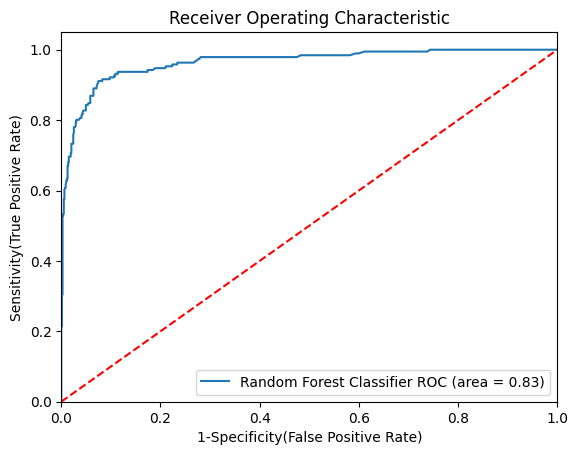

In [258]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 
